In [5]:
import os

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tips.csv to tips.csv


In [3]:
df = pd.read_csv('tips.csv')


In [4]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 26.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805911 sha256=464afc5ca76735a3cc286c05156d711088865e515d4f07364ec36e3b12ebc05e
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [6]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd

In [7]:
spark = SparkSession.builder.appName("Introduction to Spark").getOrCreate()
spark

In [8]:
df_pyspark = spark.read.csv("tips.csv")
df_pyspark

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string]

In [9]:
#Pass number of rows to be shown as integer value
df_pyspark.show(5)

+----------+----+------+------+---+------+----+
|       _c0| _c1|   _c2|   _c3|_c4|   _c5| _c6|
+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
+----------+----+------+------+---+------+----+
only showing top 5 rows



In [10]:
#Print data types
df_pyspark.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)



In [11]:
#Read the column name if header is True, inferSchema is used to infer actual data type
df_pyspark = spark.read.csv("tips.csv", header = True, inferSchema = True)
df_pyspark.show(5)

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
+----------+----+------+------+---+------+----+
only showing top 5 rows



In [12]:
df_pyspark.printSchema()

root
 |-- total_bill: double (nullable = true)
 |-- tip: double (nullable = true)
 |-- sex: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- size: integer (nullable = true)



In [13]:
#Describe data frame
df_pyspark.describe().show()

+-------+------------------+------------------+------+------+----+------+------------------+
|summary|        total_bill|               tip|   sex|smoker| day|  time|              size|
+-------+------------------+------------------+------+------+----+------+------------------+
|  count|               244|               244|   244|   244| 244|   244|               244|
|   mean|19.785942622950824|2.9982786885245902|  null|  null|null|  null| 2.569672131147541|
| stddev| 8.902411954856857|1.3836381890011815|  null|  null|null|  null|0.9510998047322347|
|    min|              3.07|               1.0|Female|    No| Fri|Dinner|                 1|
|    max|             50.81|              10.0|  Male|   Yes|Thur| Lunch|                 6|
+-------+------------------+------------------+------+------+----+------+------------------+



In [20]:
#Rename column Sex -> Gender and Time -> Event
d1 = df_pyspark.withColumnRenamed("sex", "gender").withColumnRenamed("time", "event").show(5)
d1

+----------+----+------+------+---+------+----+
|total_bill| tip|gender|smoker|day| event|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
+----------+----+------+------+---+------+----+
only showing top 5 rows



In [24]:
### Filling with mean values with an imputer
from pyspark.ml.feature import Imputer
### Create an imputer object
imputer = Imputer(
          inputCols= ["total_bill", "tip"],
          outputCols = ["{}_imputed".format(c) for c in ["total_bill", "tip"]]
    ).setStrategy("mean")
### Fit imputer on Data Frame and Transform it
imputer.fit(df_pyspark).transform(df_pyspark).show()

+----------+----+------+------+---+------+----+------------------+-----------+
|total_bill| tip|   sex|smoker|day|  time|size|total_bill_imputed|tip_imputed|
+----------+----+------+------+---+------+----+------------------+-----------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|             16.99|       1.01|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|             10.34|       1.66|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|             21.01|        3.5|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|             23.68|       3.31|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|             24.59|       3.61|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|             25.29|       4.71|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|              8.77|        2.0|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|             26.88|       3.12|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|             15.04|       1.96|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|     

In [25]:
## Groupby sex and performing sum
df_pyspark.groupBy("sex").sum().show()

+------+------------------+-----------------+---------+
|   sex|   sum(total_bill)|         sum(tip)|sum(size)|
+------+------------------+-----------------+---------+
|Female|1570.9499999999998|           246.51|      214|
|  Male|3256.8200000000024|485.0700000000001|      413|
+------+------------------+-----------------+---------+



In [27]:
## Groupby time and performing sum
df_pyspark.groupBy("time").sum().show()

+------+------------------+-----------------+---------+
|  time|   sum(total_bill)|         sum(tip)|sum(size)|
+------+------------------+-----------------+---------+
| Lunch|1167.4699999999998|           185.51|      164|
|Dinner|3660.3000000000015|546.0699999999999|      463|
+------+------------------+-----------------+---------+



In [29]:
### Group by day, max tip
df_pyspark.groupBy("day").max().select(["day", "max(tip)"]).show()
df_pyspark.groupBy("day").count().show()

+----+--------+
| day|max(tip)|
+----+--------+
|Thur|     6.7|
| Sun|     6.5|
| Sat|    10.0|
| Fri|    4.73|
+----+--------+

+----+-----+
| day|count|
+----+-----+
|Thur|   62|
| Sun|   76|
| Sat|   87|
| Fri|   19|
+----+-----+



Male      157
Female     87
Name: sex, dtype: int64
Male      64.344262
Female    35.655738
Name: sex, dtype: float64


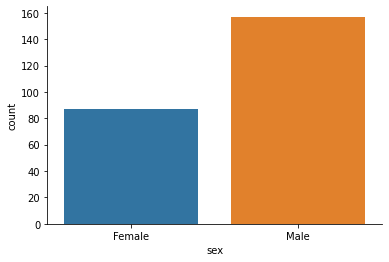

In [38]:

# Apsolute values - the number of records 

sns.countplot(x='sex', data=df)
sns.despine() # no top and right axes spine

print(df.sex.value_counts())
perc=df['sex'].value_counts(normalize=True)*100
print(perc)


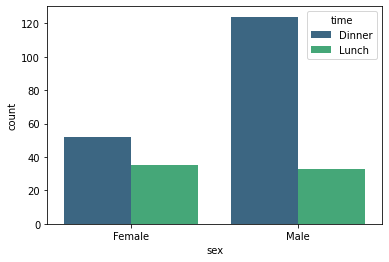

In [35]:
# show value counts for two categorical variables
sns.countplot(x='sex', data=df, hue='time', palette='viridis')

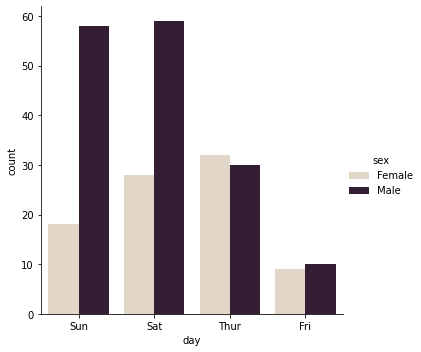

In [36]:
# show value counts for two categorical variables
sns.catplot(x='day', data=df, hue='sex', palette='ch:.25', kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Tip outliers')

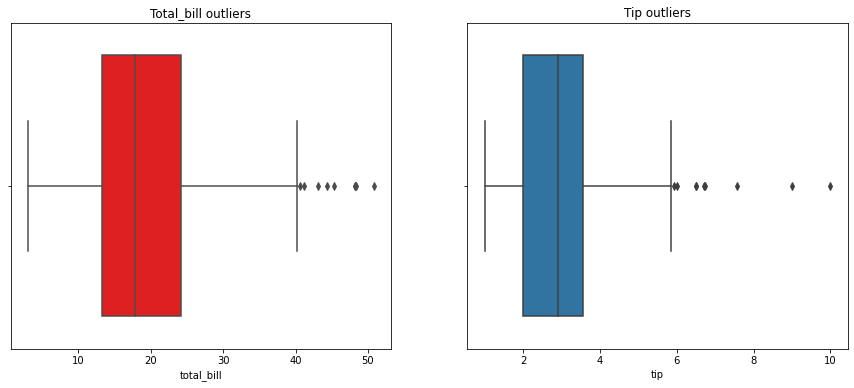

In [39]:
# detect the outliers

fig, axes = plt.subplots(1, 2,figsize=(15,6)) # plot 2 graphs

# use red color, set title
sns.boxplot(x='total_bill', data=df, color='red', ax=axes[0]).set(title='Total_bill outliers') 

# change orientation, set title
sns.boxplot(x='tip', data=df, orient='v', ax=axes[1]).set_title('Tip outliers') 

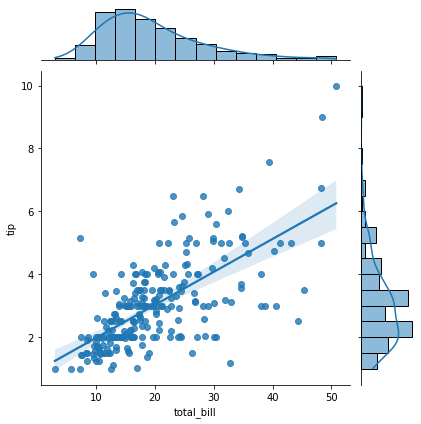

In [40]:
# add regression line and density function:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

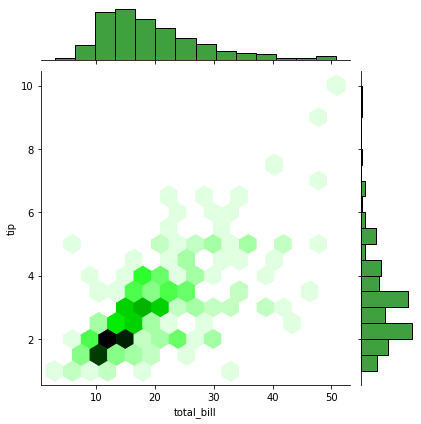

In [42]:
# Hexbin plots to show number of observations that fall within hexagonal bins
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex', color='green')

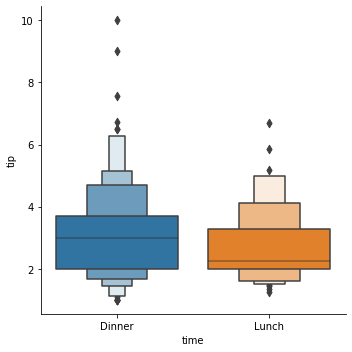

In [43]:
# use a different plot kind to visualize the tips for time
sns.catplot(x='time', y='tip', data=df, kind='boxen')